In [83]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pathlib
import spacy
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras import layers
import keras

In [84]:
# Loading the dataset 
data_dir = pathlib.Path('/home/lv11/Documents/ProyectosPython/sentimentAnalysis/train')   # datasets
nf = pd.read_csv(data_dir / 'tweetsDataset1.csv',skiprows=1,names=['Message','Target'])  # processedTweets tweetsDataset1.csv TweetsDataset
#print(nf.head(20))

nlp = English()
stop_words = list(STOP_WORDS)
#print(stop_words)

def spacy_tokenizer(sentence):
    tokens = nlp(sentence)
    tokens = [ word.lemma_.lower().strip() if word.lemma_ != '-PRON-' else word.lower_ for word in tokens ]
    tokens = [ word for word in tokens if word not in stop_words and word not in punctuation ]
    return tokens

In [85]:
vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(nf['Message'])
#print(vectorizer.vocabulary_)

vectorizer.transform(nf['Message']).toarray()

messages = nf['Message']
labels = nf['Target']

In [86]:
x_train, x_test, y_train, y_test = train_test_split(messages,labels,test_size=0.25,random_state=1000,shuffle=True)

len(x_test)
len(x_train)

1727

In [87]:
vectorizer.fit(x_train)
X_train = vectorizer.transform(x_train).toarray()
X_test = vectorizer.transform(x_test).toarray()

#rint(X_train)
#print(X_test)

In [88]:
features = 3749 #6136
shufle = True
drop = 0.5
layer1 = 512
layer2 = 256
epoch = 5
lr = 0.002
epsilon = 1e-9
validation = 0.1

In [89]:
model = Sequential()
model.add(layers.Dense(layer1, input_dim=features,activation='relu'))
model.add(layers.Dropout(drop))
model.add(layers.Dense(layer2,activation='sigmoid'))
model.add(layers.Dropout(drop))
model.add(layers.Dense(3,activation='softmax'))

In [90]:
optimizer = keras.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=epsilon,decay=0.0,amsgrad=False)

In [91]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 512)               1920000   
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_16 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 3)                 771       
Total params: 2,052,099
Trainable params: 2,052,099
Non-trainable params: 0
_________________________________________________________________


In [92]:
history = model.fit(np.array(X_train),y_train,batch_size=32,epochs=epoch,verbose=1,validation_split=validation,shuffle=shufle)

Train on 1554 samples, validate on 173 samples
Epoch 1/5
1554/1554 [==============================] - 2s 1ms/step - loss: 0.5496 - accuracy: 0.7342 - val_loss: 0.2139 - val_accuracy: 0.8844
Epoch 2/5
1554/1554 [==============================] - 2s 1ms/step - loss: 0.1287 - accuracy: 0.9447 - val_loss: 0.2092 - val_accuracy: 0.8786
Epoch 3/5
1554/1554 [==============================] - 2s 1ms/step - loss: 0.0524 - accuracy: 0.9813 - val_loss: 0.2114 - val_accuracy: 0.9075
Epoch 4/5
1554/1554 [==============================] - 2s 1ms/step - loss: 0.0235 - accuracy: 0.9923 - val_loss: 0.2464 - val_accuracy: 0.9017
Epoch 5/5
1554/1554 [==============================] - 2s 1ms/step - loss: 0.0134 - accuracy: 0.9968 - val_loss: 0.2788 - val_accuracy: 0.9017


In [93]:
pred = model.predict(X_test)
#pred

In [94]:
xtest = [x for x in x_test]
for i in range(len(pred)):
    sent = (1 if pred[i][1] > 0.5 else 0)
    print("tweet=",xtest[i], " || prediction=",sent)

snap chat unhappy   || prediction= 0
tweet=  it's just got 3 years longer unhappy     || prediction= 0
tweet= so sorry I havent been checking my tweets unhappy  We are all here for you!  || prediction= 0
tweet= Alright. Looks like back to chores behind the scenes. My page hits drop to 1K daily when I don't visit and post. unhappy   || prediction= 0
tweet= come back callie  gabbie d ghost unhappy  i love you both  || prediction= 0
tweet= unhappy  :/ unhappy   feeling sick  || prediction= 0
tweet= same unhappy    || prediction= 0
tweet= Thanks for the recent follow Happy to connect happy  have a great Thursday..10  || prediction= 1
tweet= Koalas are dying of thirst  and it's all because of us unhappy  .8  || prediction= 0
tweet= Definitely my arms unhappy  .14  || prediction= 0
tweet= unhappy  oh man..  || prediction= 0
tweet= good crying with joy  i love you so much  || prediction= 1
tweet= Guess who's not getting a unicorn frappuccino because they're sold out unhappy .1  || prediction=

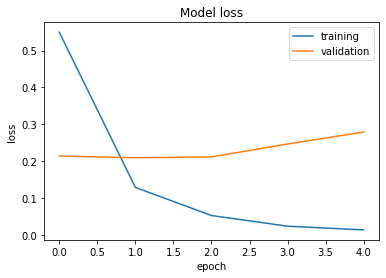

In [95]:
plt.title('Model loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training','validation'],loc='upper right')
plt.show()

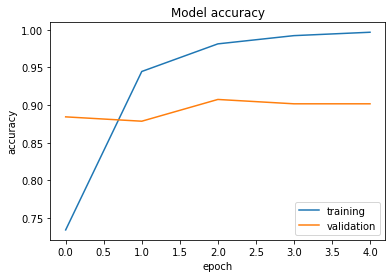

In [96]:
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

In [97]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print("test loss:", test_loss)
print("test accuracy:", test_acc)

576/576 [==============================] - 0s 198us/step
test loss: 0.3790655761129326
test accuracy: 0.8715277910232544


In [98]:
a = model.predict(vectorizer.transform(["somthing is bad"]))
1 if a[0][1] > 0.5 else 0

0

In [104]:
import accessing_published_tweets

user = 'Luckficus'
twitterClient = accessing_published_tweets.TwitterClient(user)
tweetAnalyzer = accessing_published_tweets.TweetAnalyzer()

tweets = twitterClient.get_user_timeline_tweets(13)
tweets = tweetAnalyzer.tweets_to_data_frame(tweets)

tweets['tweets']

0     The sklearn model is performing great! Happy n...
1       There is people being hurt and they don't care.
2     All the notebooks are really out of my reach r...
3     The Crown is really boring, it's like watch th...
4     @AbriltheDuchess No me cancelen, son twts d pr...
5     I wanted to do some platzi courses but I can't...
6                                    @covipex Por favor
7                 Boka juniors is unhappy since 9/12/18
8                      My sis cooked some good brownies
9                    I hate all the Harry Potter movies
10    River tied with Sao Paulo, it was such a great...
11    @covipex Estos son twts de prueba para un proy...
12                128 days of cuarentine, what a boomer
13    RT @DeandraDelgadoo: Convocatoria abierta 👉 ht...
Name: tweets, dtype: object

In [102]:
for tweet in tweets['tweets']:
    prediction = model.predict(vectorizer.transform([tweet]))
    sentiment = 1 if prediction[0][1] > 0.5 else 0 
    print(tweet,", sentiment: ",sentiment)

The sklearn model is performing great! Happy news to me. , sentiment:  1
There is people being hurt and they don't care. , sentiment:  1
All the notebooks are really out of my reach right now. Sad moment :( , sentiment:  0
The Crown is really boring, it's like watch the history Channel , sentiment:  0
@AbriltheDuchess No me cancelen, son twts d prueba , sentiment:  1
I wanted to do some platzi courses but I can't. Depressed. Thanks Albert Fernández ahre , sentiment:  1
@covipex Por favor , sentiment:  1
Boka juniors is unhappy since 9/12/18 , sentiment:  0
My sis cooked some good brownies , sentiment:  0
I hate all the Harry Potter movies , sentiment:  0
